In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [6]:
df = pd.read_csv('../dataset/Student_performance.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (6607, 20)


In [7]:
print("First 10 rows")
print(df.head(10))
print("\n" + "="*50 + "\n")
print("Column Name and Types:")
print(df.info())
print("\n" + "="*50 + "\n")
print("Numerical Summary:")
print(df.describe())
print("\n" + "="*50 + "\n")
print("Missing Values:")
print(df.isnull().sum())

First 10 rows
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                       

## Data Understanding

**Dataset Shape**  (6607,20)
**Target variables (scores):** Previous Scores

**Categorical features:**  Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,
Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender

**Numerical features:** Hours_Studied, Attendance, Sleep_Hours, Tutoring_Sessions, Physical_Activity

**Missing values:** Teacher_Quality, Parental_Education_Level, Distance_from_Home 

In [8]:
print("Columns in dataset:")
print(df.columns.tolist())

Columns in dataset:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [9]:
print("Gender distribution:")
print(df['Gender'].value_counts())
print("\n")

Gender distribution:
Gender
Male      3814
Female    2793
Name: count, dtype: int64




In [10]:
gender_stats = df.groupby('Gender')['Exam_Score'].agg([
    'count',
    'mean',
    'std',
    'min',
    'max'
]).round(2)

print("Exam Score Statistics by Gender:")
print(gender_stats)
print("\n")

Exam Score Statistics by Gender:
        count   mean   std  min  max
Gender                              
Female   2793  67.24  4.05   57  101
Male     3814  67.23  3.77   55   99




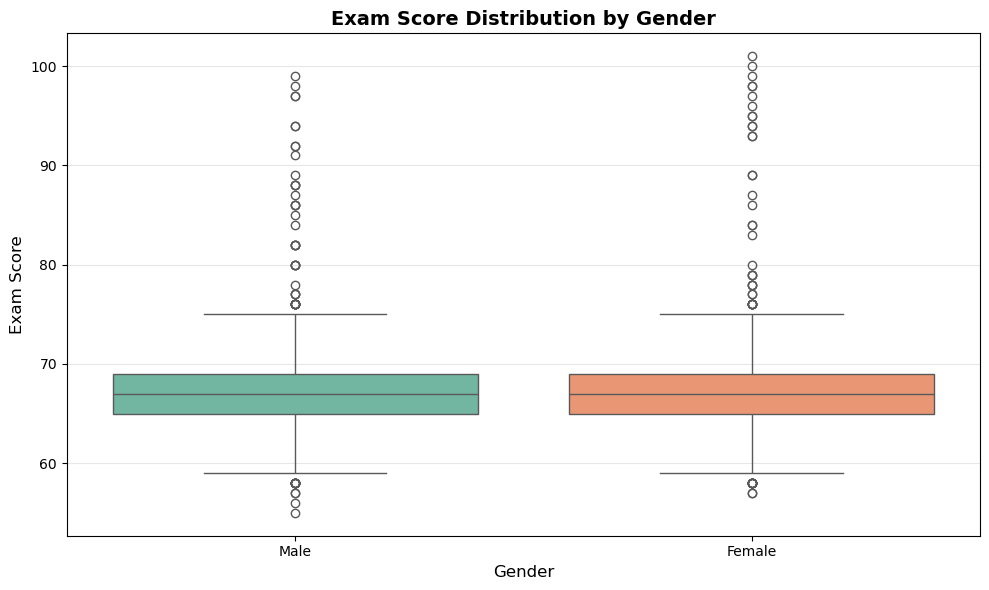

Chart saved: exam_score_by_gender.png


In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Exam_Score', hue='Gender', palette='Set2', legend=False)
plt.title('Exam Score Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('exam_score_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: exam_score_by_gender.png")

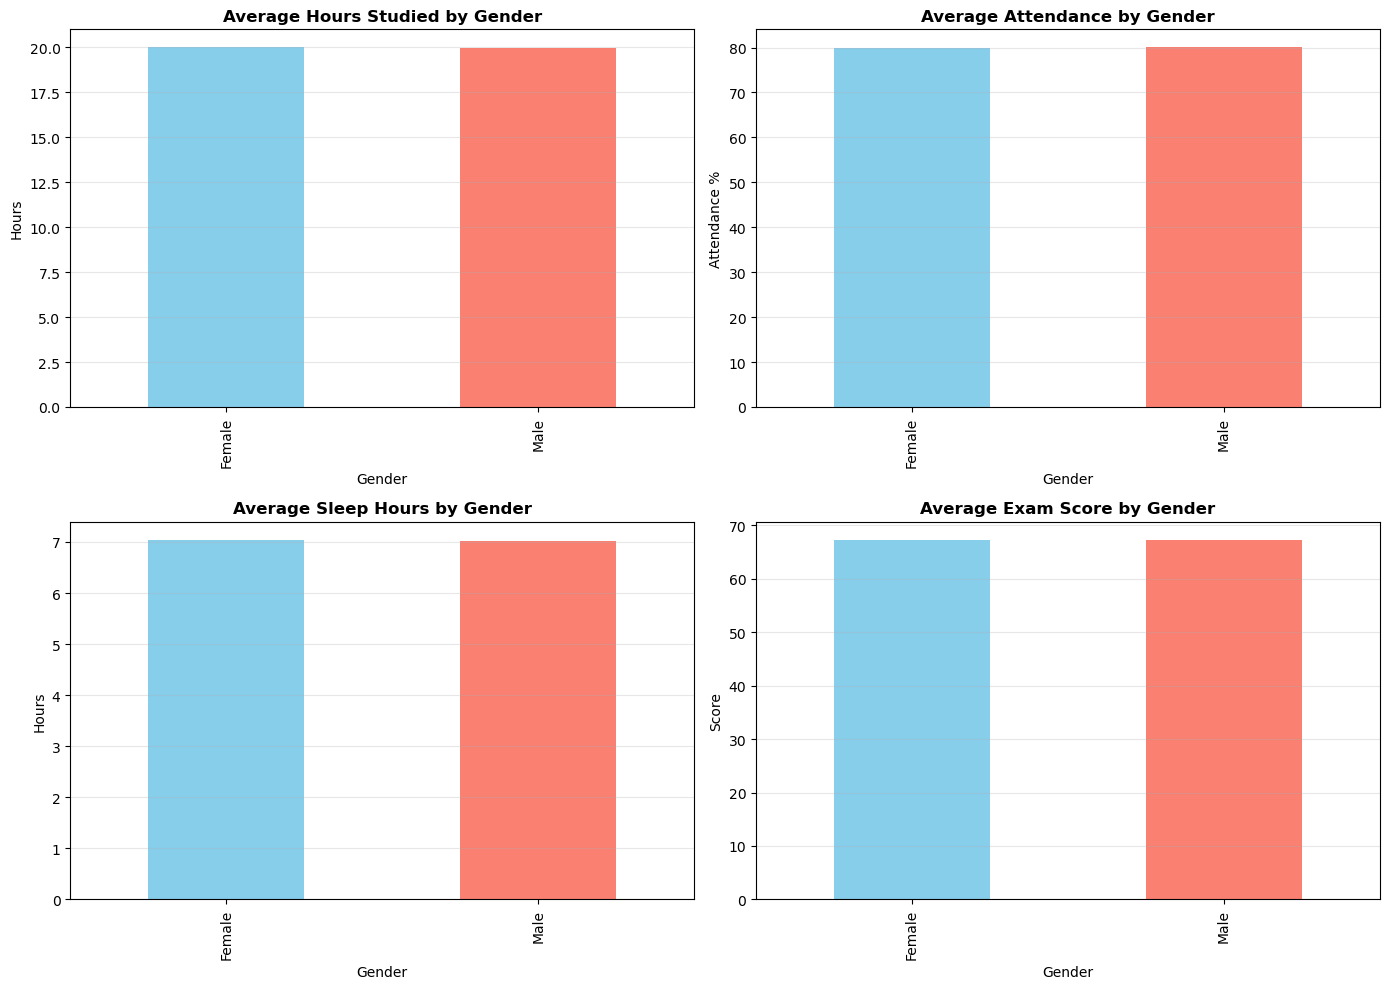

Chart saved: gender_comparison_grid.png


In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Hours Studied
df.groupby('Gender')['Hours_Studied'].mean().plot(kind='bar', ax=axes[0,0], color=['skyblue', 'salmon'])
axes[0,0].set_title('Average Hours Studied by Gender', fontweight='bold')
axes[0,0].set_ylabel('Hours')
axes[0,0].set_xlabel('Gender')
axes[0,0].grid(axis='y', alpha=0.3)

# Attendance
df.groupby('Gender')['Attendance'].mean().plot(kind='bar', ax=axes[0,1], color=['skyblue', 'salmon'])
axes[0,1].set_title('Average Attendance by Gender', fontweight='bold')
axes[0,1].set_ylabel('Attendance %')
axes[0,1].set_xlabel('Gender')
axes[0,1].grid(axis='y', alpha=0.3)

# Sleep Hours
df.groupby('Gender')['Sleep_Hours'].mean().plot(kind='bar', ax=axes[1,0], color=['skyblue', 'salmon'])
axes[1,0].set_title('Average Sleep Hours by Gender', fontweight='bold')
axes[1,0].set_ylabel('Hours')
axes[1,0].set_xlabel('Gender')
axes[1,0].grid(axis='y', alpha=0.3)

# Exam Score
df.groupby('Gender')['Exam_Score'].mean().plot(kind='bar', ax=axes[1,1], color=['skyblue', 'salmon'])
axes[1,1].set_title('Average Exam Score by Gender', fontweight='bold')
axes[1,1].set_ylabel('Score')
axes[1,1].set_xlabel('Gender')
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('gender_comparison_grid.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: gender_comparison_grid.png")